In [131]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cols = ['age','workclass','fnlwgt','education','education_num','marital-status','occupation', 'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

adults_df = pd.read_csv('adult.data', names = cols)
adults_df.head()


,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [132]:
def one_hot_encoding():
    columns = ['marital-status','occupation','relationship']
    adults_df = pd.read_csv('adult.data', names = cols)
    adults_df = pd.get_dummies(adults_df, columns =columns, dtype = int)
    return adults_df

pd.set_option('display.max_columns', None)
adults_df = one_hot_encoding()
adults_df.head()

,age,workclass,fnlwgt,education,education_num,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,39,State-gov,77516,Bachelors,13,White,Male,2174,0,40,United-States,<=50K,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,White,Male,0,0,13,United-States,<=50K,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,38,Private,215646,HS-grad,9,White,Male,0,0,40,United-States,<=50K,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,53,Private,234721,11th,7,Black,Male,0,0,40,United-States,<=50K,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,28,Private,338409,Bachelors,13,Black,Female,0,0,40,Cuba,<=50K,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [133]:
adults_df.duplicated().any()

adults_df = adults_df.drop_duplicates()    
adults_df.duplicated().any()

False

In [134]:
adults_df['income'] = np.where(adults_df['income'].str.contains('>') ,1,0)
adults_df.head()

,age,workclass,fnlwgt,education,education_num,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,39,State-gov,77516,Bachelors,13,White,Male,2174,0,40,United-States,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,White,Male,0,0,13,United-States,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,38,Private,215646,HS-grad,9,White,Male,0,0,40,United-States,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,53,Private,234721,11th,7,Black,Male,0,0,40,United-States,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,28,Private,338409,Bachelors,13,Black,Female,0,0,40,Cuba,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [135]:
lr_df = adults_df[['income','hours-per-week']]
lr_df.head()
lr_df.corr()

,income,hours-per-week
income,1.000000,0.229658
hours-per-week,0.229658,1.000000


In [139]:
linX =lr_df[['hours-per-week']]
liny = lr_df['income']


linX_train, linX_test, liny_train, liny_test = train_test_split(linX, liny, 
                                                    test_size=0.3, 
                                                    random_state=32)
sc = StandardScaler()
linX_train = sc.fit_transform(linX_train)
linX_test = sc.fit_transform(linX_test)

In [140]:
lin_model = LinearRegression()
lin_model.fit(linX_train,liny_train)

liny_pred = lin_model.predict(linX_test)
liny_pred

array([0.40715573, 0.34902496, 0.24106781, ..., 0.32411177, 0.32411177,
       0.24106781])

In [141]:
lin_model.score(linX_test,liny_test)

0.04360003840167059

The model didn't do well. linear regreesion is not a good approach for this set because the outcome was binary, and we'd have to use more then one feature to have enough data for the model to perform well. 

In [142]:
#question 3 
columns = ['occupation_ Adm-clerical','occupation_ Armed-Forces','occupation_ Craft-repair','occupation_ Exec-managerial',
           'occupation_ Farming-fishing','occupation_ Handlers-cleaners','occupation_ Machine-op-inspct','occupation_ Other-service',
           'occupation_ Priv-house-serv','occupation_ Prof-specialty','occupation_ Protective-serv','occupation_ Sales','occupation_ Tech-support',
           'occupation_ Transport-moving','relationship_ Husband','relationship_ Not-in-family','relationship_ Other-relative','relationship_ Own-child','relationship_ Unmarried','relationship_ Wife',
           'capital-gain','capital-loss','hours-per-week','education_num','age','income']
model_df = adults_df[columns]
model_df.head()

,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,capital-gain,capital-loss,hours-per-week,education_num,age,income
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2174,0,40,13,39,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,13,13,50,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,40,9,38,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,40,7,53,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,40,13,28,0


In [143]:
kX = model_df.drop('income', axis =1)
ky = model_df['income']

kX_train, kX_test, ky_train, ky_test = train_test_split(kX, ky, test_size = 0.3,
                                                    random_state=32,stratify = ky)

sc = StandardScaler()
kX_train = sc.fit_transform(kX_train)
kX_test = sc.fit_transform(kX_test)

knn_model = KNeighborsClassifier(n_neighbors=17)
knn_model.fit(kX_train, ky_train)


y_predict = knn_model.predict(kX_test)
y_predict

array([0, 0, 0, ..., 1, 0, 0])

In [144]:
knn_model.score(kX_test, ky_test)

0.8440893259577955

the knn model seems to do well.

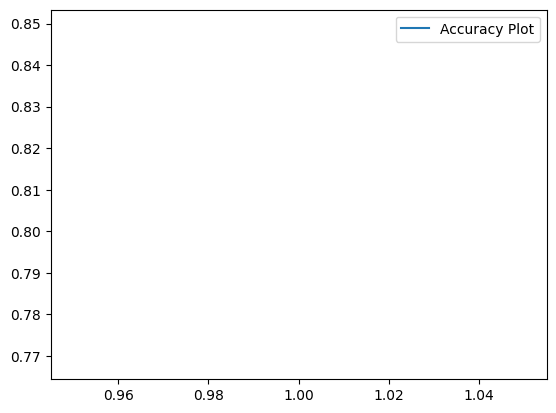

In [145]:
accuracy = []
neighbors = range(1,17,17)
for i in neighbors:
    knn_model = KNeighborsClassifier(n_neighbors=1)
    knn_model.fit(kX_train, ky_train) 
    result = knn_model.score(kX_test, ky_test)
    accuracy.append(result)

    plt.plot(neighbors, accuracy, label = 'Accuracy Plot')
    plt.legend()

In [146]:
#question 4
lgX= model_df.drop('income',axis =1)
lgy = model_df['income']

lgX_train,  lgX_test, lgy_train, lgy_test = train_test_split(lgX, lgy, test_size = 0.3,
                                                    random_state=32,stratify = lgy)
sc = StandardScaler()
lgX_train = sc.fit_transform(lgX_train)
lgX_test = sc.fit_transform(lgX_test)

log_model =LogisticRegression(random_state=32).fit(lgX_train, lgy_train)
lgy_predict = log_model.predict(lgX_test)
lgy_predict


array([0, 0, 0, ..., 1, 0, 0])

In [147]:
log_model.score(lgX_test, lgy_test)

0.850440483507478

In [ ]:
#the LR model performed the best here. 

In [ ]:
#question 5 

In [148]:
scaler = MinMaxScaler() 
linX_train = scaler.fit_transform(linX_train)
linX_test = scaler.fit_transform(linX_test)

lin_model.score(linX_test,liny_test)

-0.0022082959361693355

In [150]:
kX_train = scaler.fit_transform(kX_train)
kX_test = scaler.fit_transform(lgX_test)

log_model.score(lgX_test, lgy_test)

0.850440483507478

In [ ]:
#normilization made the models worse.